# Real-Time Fraud Detection and prevention System for ePay

# Objective: -

Online payment systems has helped a lot in the ease of payments. But, at the same time, it increased in payment frauds. The primary objective of this project is to detect and prevent fraudulent online payments in real-time, ensuring that genuine users are not wrongly charged for transactions they never authorized. By leveraging data analytics and machine learning, the goal is to build a system that helps ePay safeguard its users by accurately identifying suspicious activities and minimizing financial losses due to fraud.

The goal of this challenge is to build a machine learning model that predicts the chances of frauds upon payments. 

# Dataset: -

The dataset used in this model is publicly available and was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA.

Attribute Information:
1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [1]:
pip install plotly

  Using cached plotly-6.0.1-py3-none-any.whl.metadata (6.7 kB)
Using cached plotly-6.0.1-py3-none-any.whl (14.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Loading libraries 
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import warnings

warnings.filterwarnings('ignore')

# Step 2 : Load dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.

In [3]:
#loading the dataset
try:
    df = pd.read_csv('onlinefraud1.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")

Data read done successfully...


In [4]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df = df.iloc[-20000:]

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

**Why we drop column?**

Axis are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0) 
and the second running horizontally across columns (axis 1).

In [6]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 20000 rows and 11 columns


In [7]:
df['isFraud'].value_counts()

isFraud
0    19356
1      644
Name: count, dtype: int64

# Step 4: Data Info

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 6342670 to 6362669
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            20000 non-null  int64  
 1   type            20000 non-null  object 
 2   amount          20000 non-null  float64
 3   nameOrig        20000 non-null  object 
 4   oldbalanceOrg   20000 non-null  float64
 5   newbalanceOrig  20000 non-null  float64
 6   nameDest        20000 non-null  object 
 7   oldbalanceDest  20000 non-null  float64
 8   newbalanceDest  20000 non-null  float64
 9   isFraud         20000 non-null  int64  
 10  isFlaggedFraud  20000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.7+ MB


# Step 4: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000
mean,702.655100,1.711251e+05,4.669472e+05,4.330042e+05,1.006542e+06,1.087410e+06,0.032200,0.001800
std,26.193939,6.071213e+05,1.708516e+06,1.547523e+06,3.853112e+06,3.887122e+06,0.176535,0.042389
min,15.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,694.000000,1.096798e+04,1.875500e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,705.000000,5.710039e+04,2.242350e+04,6.829000e+01,0.000000e+00,8.643147e+04,0.000000,0.000000
75%,710.000000,1.861216e+05,1.034688e+05,1.121242e+05,6.022101e+05,7.345272e+05,0.000000,0.000000
max,743.000000,1.000000e+07,5.731626e+07,4.731626e+07,1.723190e+08,1.723212e+08,1.000000,1.000000


# Summary Statistics

**Measure central tendency**

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.

Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?

The mean is used to summarize a data set. It is a measure of the center of a data set.


In [10]:
numeric_df = df.select_dtypes(include=['number'])  # Selects only numeric columns
print(numeric_df.mean())

step              7.026551e+02
amount            1.711251e+05
oldbalanceOrg     4.669472e+05
newbalanceOrig    4.330042e+05
oldbalanceDest    1.006542e+06
newbalanceDest    1.087410e+06
isFraud           3.220000e-02
isFlaggedFraud    1.800000e-03
dtype: float64


# 2.Median

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.The median will depict that the patient below median is Malignent and above that are Benign.

In [11]:
numeric_df = df.select_dtypes(include=['number'])  # Selects only numeric columns
print(numeric_df.median())

step                705.00
amount            57100.39
oldbalanceOrg     22423.50
newbalanceOrig       68.29
oldbalanceDest        0.00
newbalanceDest    86431.47
isFraud               0.00
isFlaggedFraud        0.00
dtype: float64


# 3. Mode
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [12]:
df.mode()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,692.0,PAYMENT,10000000.0,C1000021663,0.0,0.0,C1006501329,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,C1000149880,NaN,NaN,C1030670078,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,C1000150436,NaN,NaN,C1091071142,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,C1000171958,NaN,NaN,C1093723175,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,C1000264823,NaN,NaN,C1149981653,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,NaN,NaN,C999561448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,NaN,NaN,NaN,C999628527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,NaN,NaN,NaN,C999660189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,NaN,NaN,NaN,C999695992,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handling Null and NaN values

1. **Null Values**

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [13]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

As we notice that there are no null values in our dataset

2. **Nan Values**

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [14]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

In [15]:
duplicate_rows = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step:

<Axes: xlabel='type', ylabel='count'>

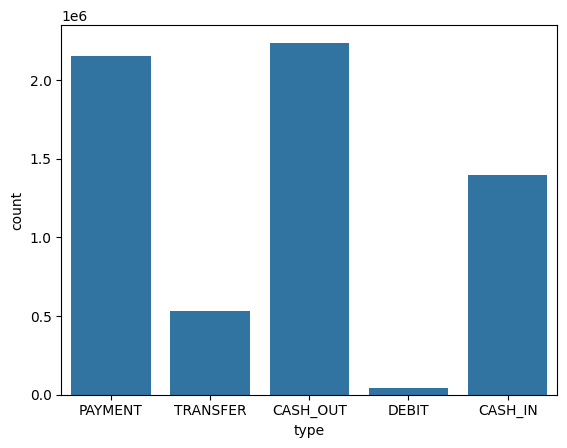

In [16]:
df = pd.read_csv('onlinefraud1.csv')
sns.countplot(df, x='type')

CASH_OUT is the most frequent transaction and DEBIT the lowest.
Now let’s check the maximum amount of each transaction.

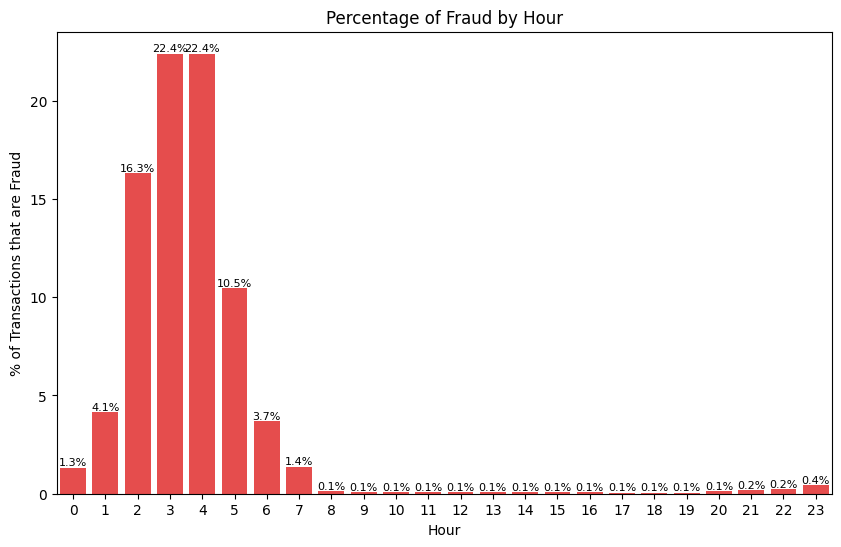

In [17]:
df['hour'] = (df['step'] - 1) % 24
fraud_percentage_by_hour = (df[df['isFraud'] == 1]['hour'].value_counts() / df['hour'].value_counts()) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_percentage_by_hour.index, y=fraud_percentage_by_hour.values, color='red', alpha=0.8)

plt.xlabel('Hour')
plt.ylabel('% of Transactions that are Fraud')
plt.title('Percentage of Fraud by Hour')

for index, value in enumerate(fraud_percentage_by_hour):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=8)

In the early hours is when we are most likely to have a fraudulent transaction.

# Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

#### Histograms for Feature Distributions

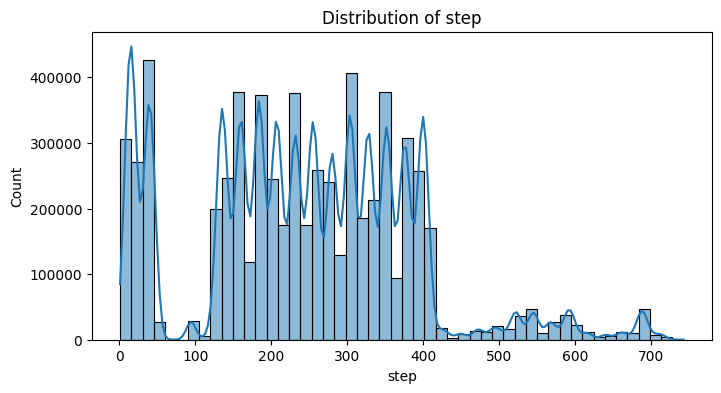

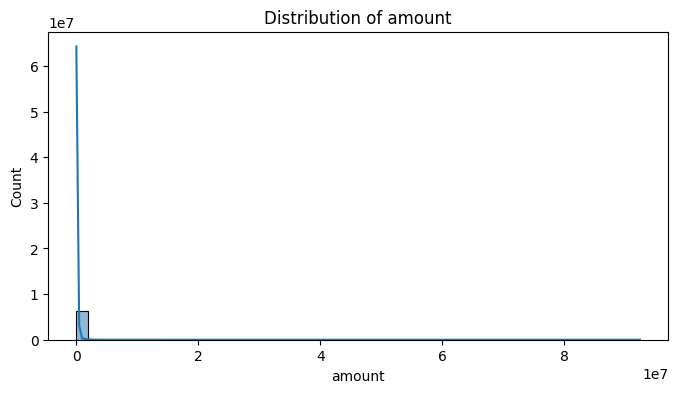

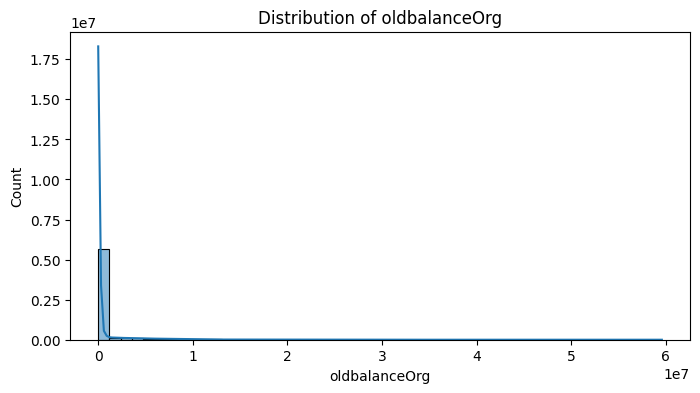

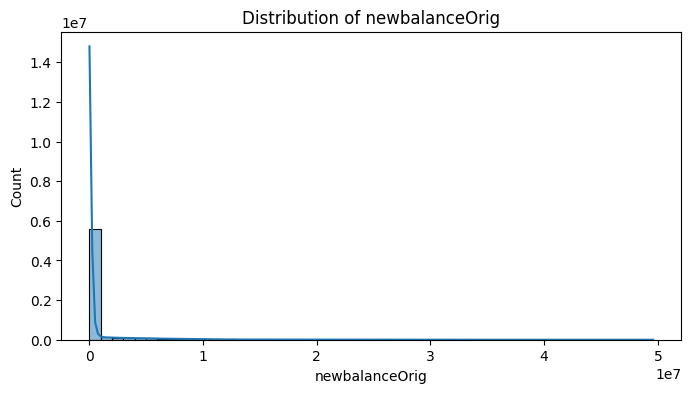

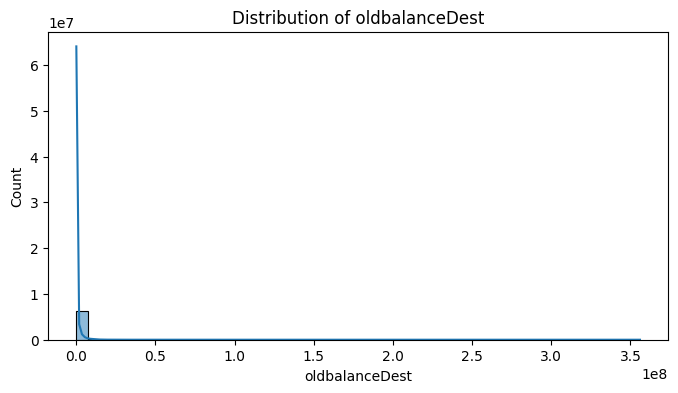

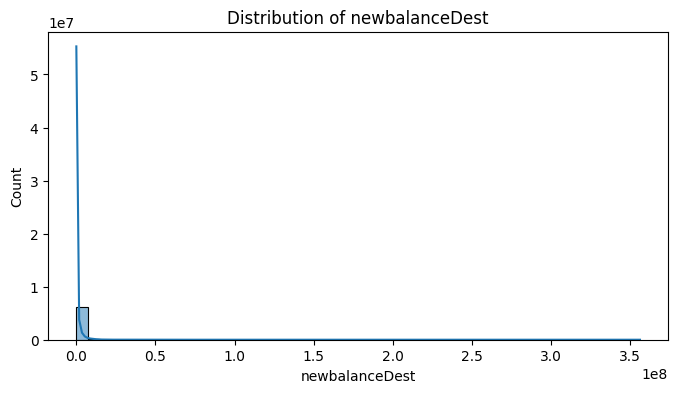

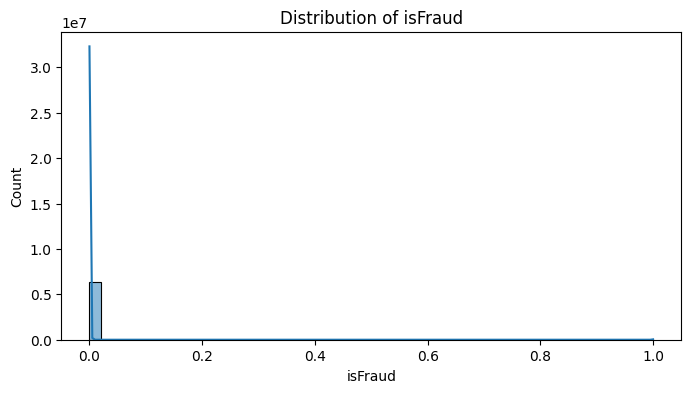

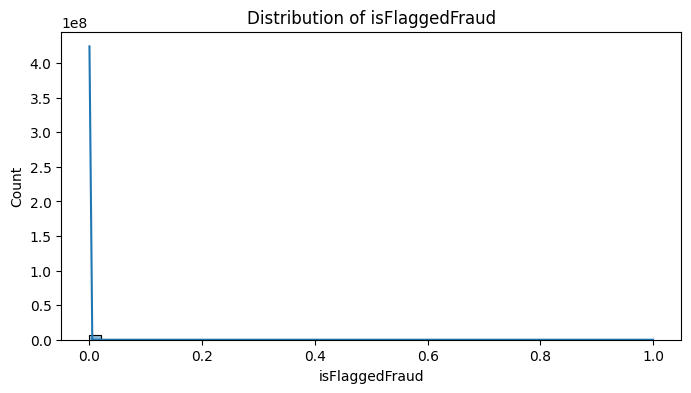

In [30]:
import seaborn as sns

for col in numeric_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()


#### Pairplot for Feature Relationships

#### What is a Pairplot?

A pairplot creates a matrix of plots:

Each diagonal shows the distribution (often as histograms or KDE plots) of a single feature.

Each off-diagonal cell shows a scatter plot (or another relationship plot) between two features.

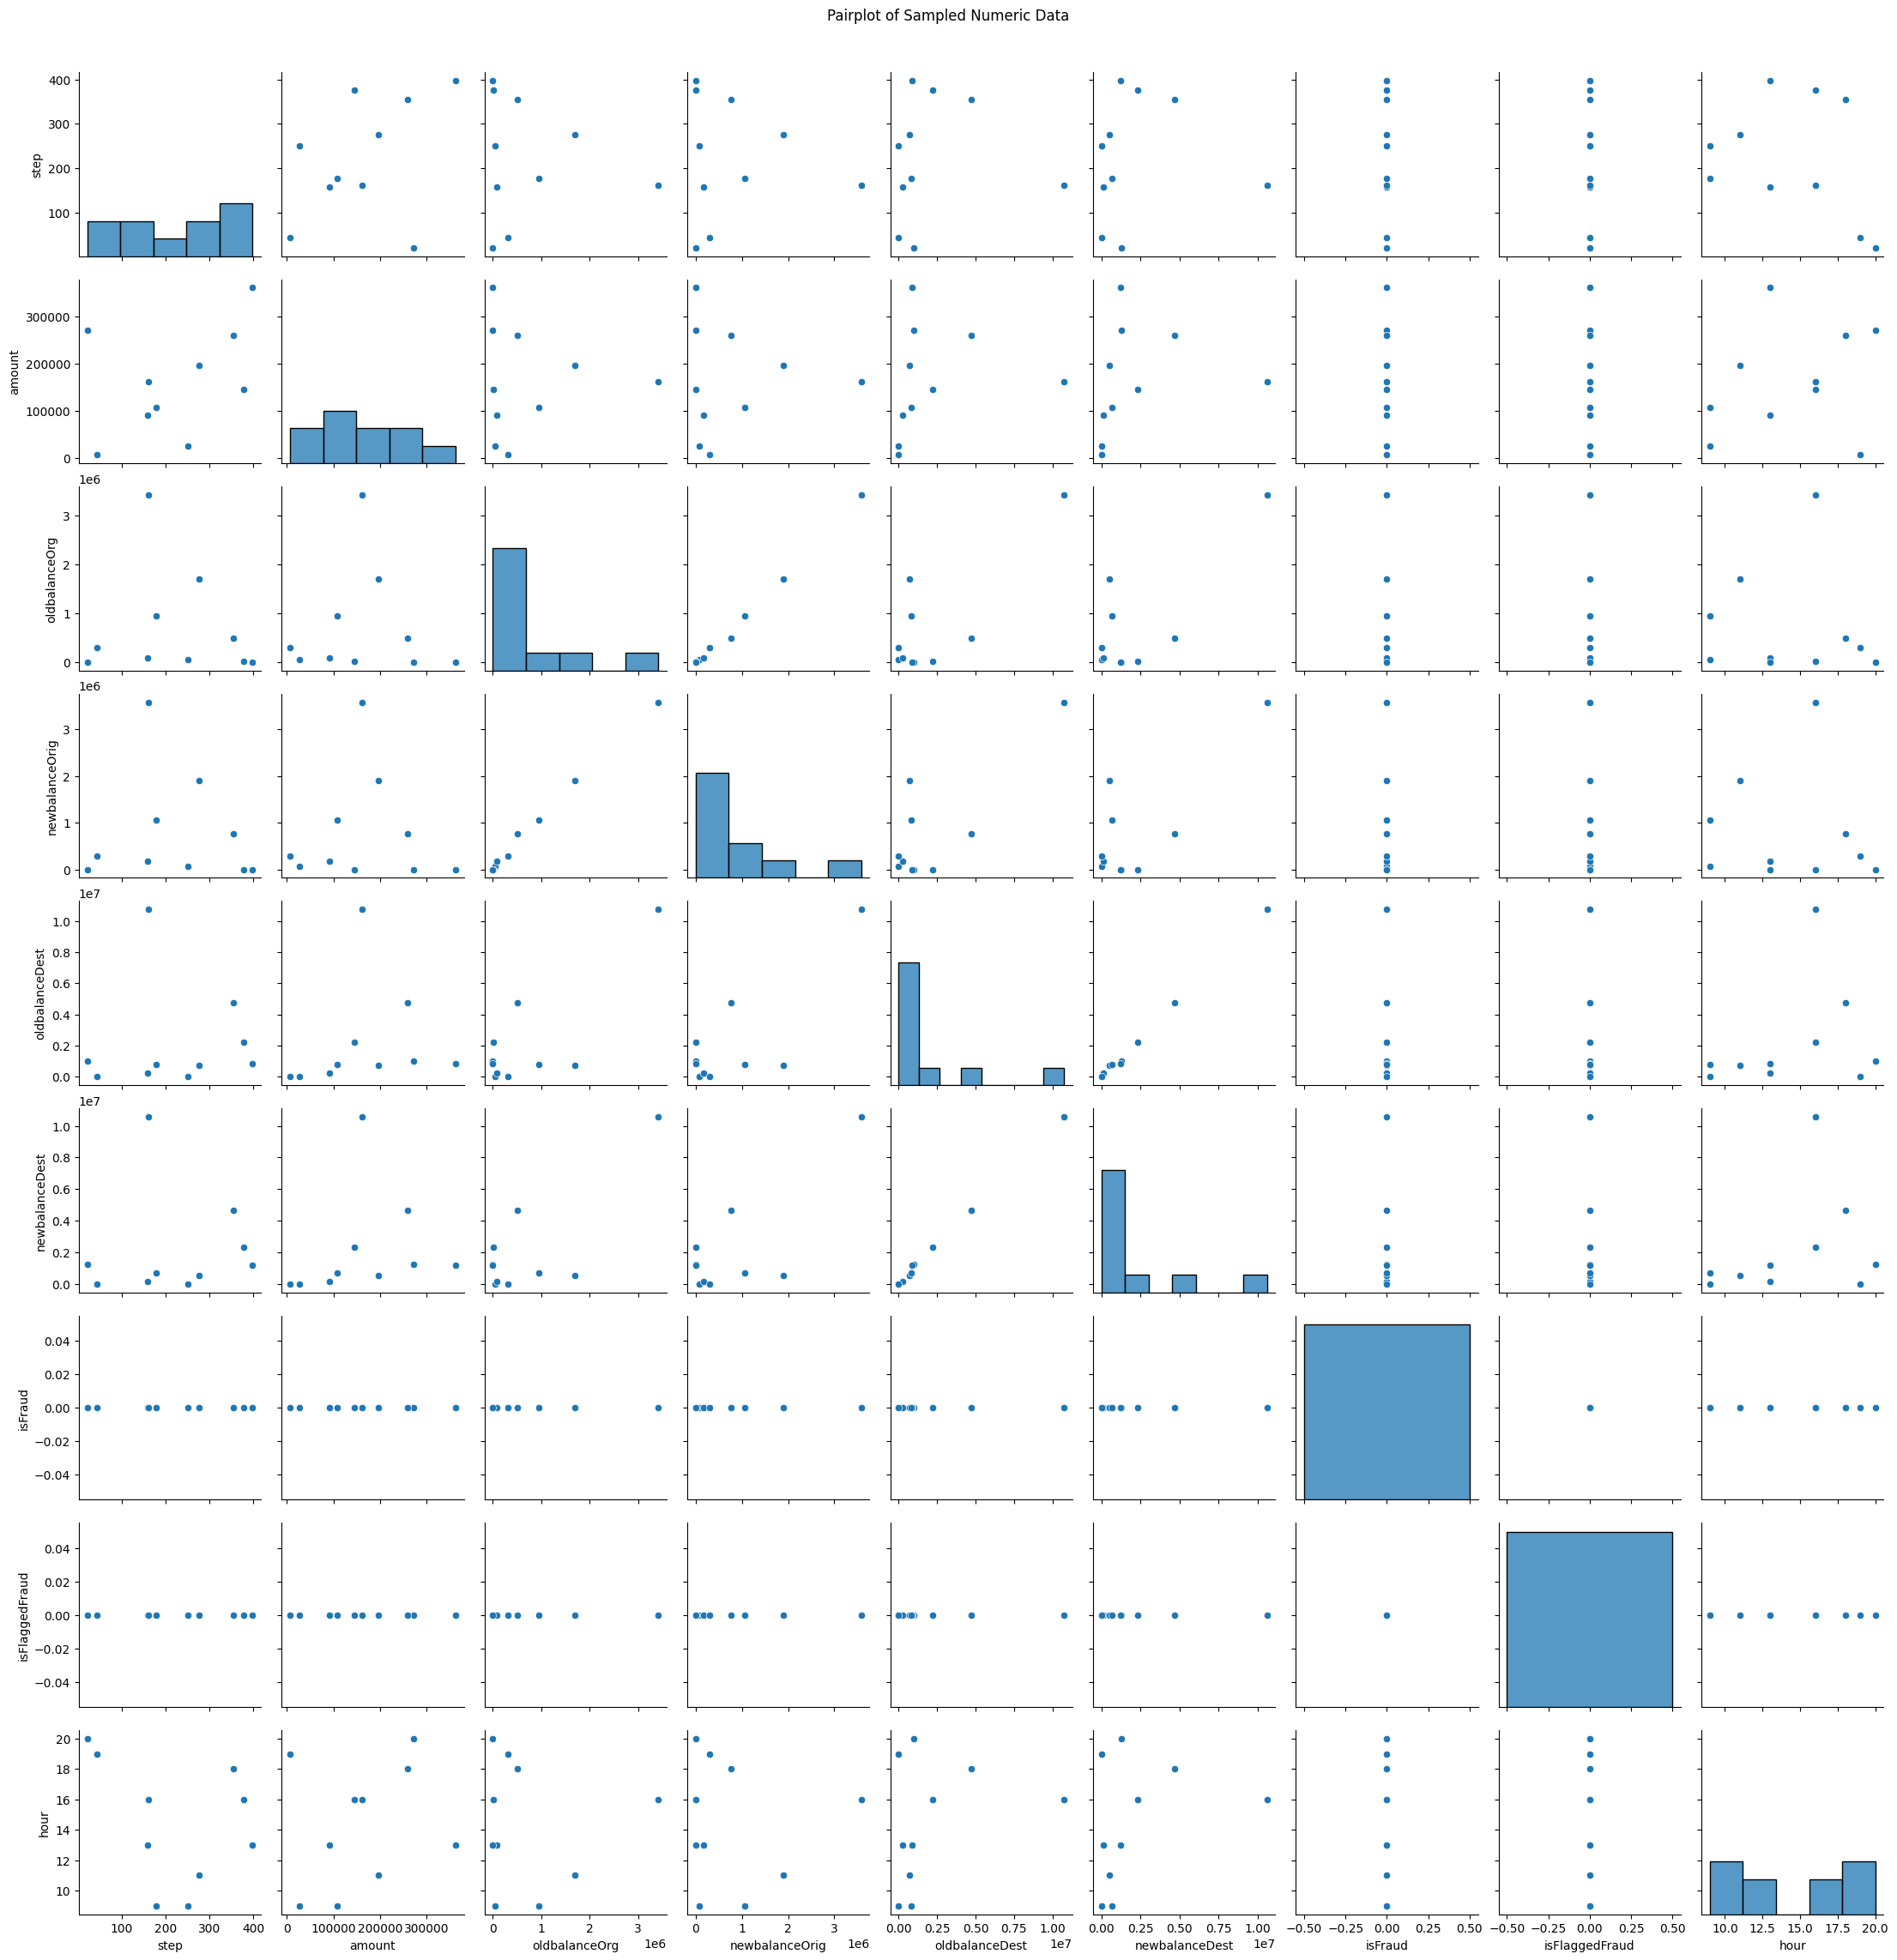

In [31]:
sample_df = df.sample(n=10, random_state=42)  # reduce if dataset is huge
sns.pairplot(sample_df.select_dtypes(include='number'))
plt.suptitle("Pairplot of Sampled Numeric Data", y=1.02)
plt.show()



#### KDE Plot for Density Comparison Between Classes

A Kernel Density Estimate (KDE) plot is used to visualize the probability distribution of a continuous variable. When grouped by a categorical feature (like class labels), KDE plots are extremely useful to compare how the distributions differ between classes.

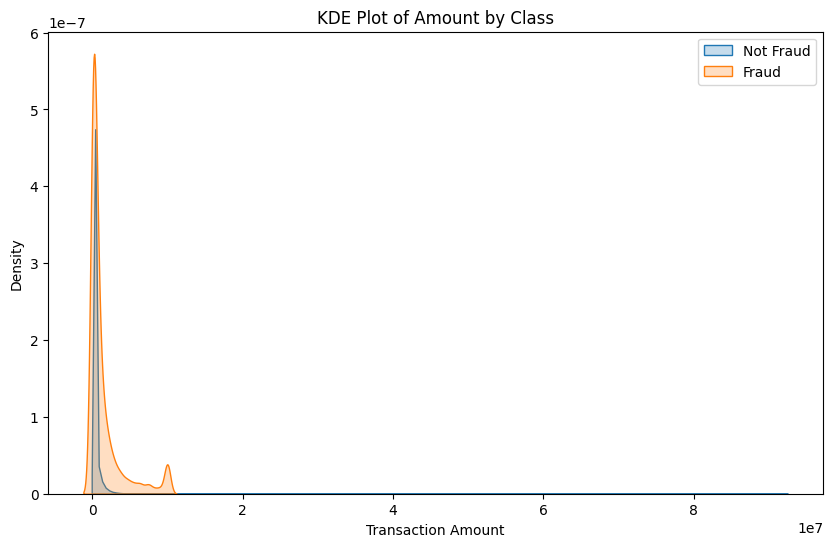

In [32]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['isFraud'] == 0]['amount'], label="Not Fraud", shade=True)
sns.kdeplot(data=df[df['isFraud'] == 1]['amount'], label="Fraud", shade=True)
plt.title("KDE Plot of Amount by Class")
plt.xlabel("Transaction Amount")
plt.legend()
plt.show()


#### Pie Chart for Class Distribution (e.g., Fraud vs Not Fraud)

A Pie Chart is a simple and effective way to visualize the proportion of categories within a target variable. It's commonly used to show class distribution in classification problems—especially helpful to highlight imbalanced datasets, such as detecting fraudulent vs non-fraudulent transactions.

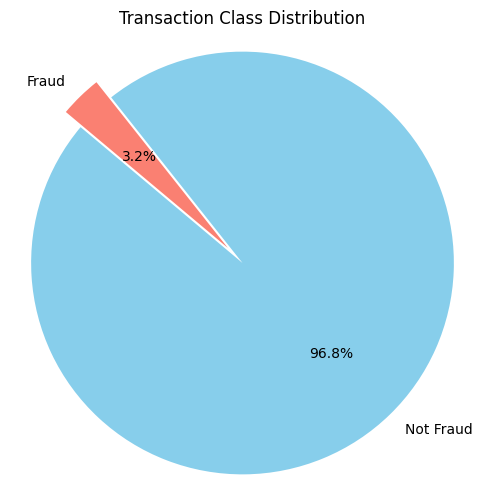

In [33]:
df = df.iloc[-20000:]
import matplotlib.pyplot as plt

# Assuming your target column is named 'isFraud'
class_counts = df['isFraud'].value_counts()
labels = class_counts.index.map({0: 'Not Fraud', 1: 'Fraud'})  # adjust labels as needed
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=[0, 0.1])
plt.title('Transaction Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


# Outlier Analysis

Outliers are data points that deviate significantly from the rest of the data. In the context of fraud detection, they can be unusual transactions that differ greatly from normal customer behavior — and sometimes, those outliers are the frauds.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- So we will keep it unchanged as it won't affect our model.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

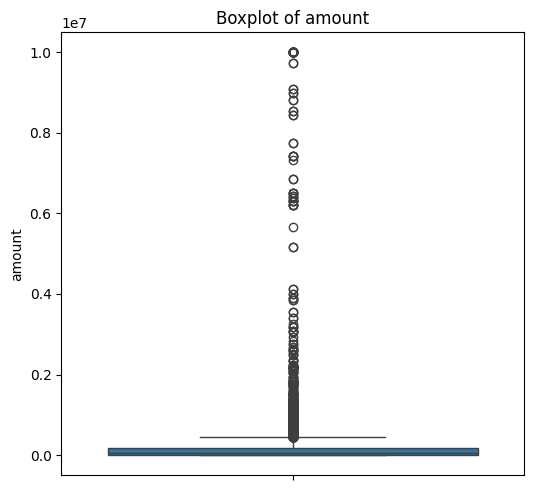

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Outliers using Boxplots
plt.figure(figsize=(15, 5))
for i, column in enumerate(['amount']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=column, data=df)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


### Removing outliers using zscore

The Z-score measures how many standard deviations a data point is from the mean.

A Z-score of 0 means the value is exactly at the mean.

Values with |Z| > 3 (or some other threshold) are considered outliers.

In [35]:
from scipy.stats import zscore

# Select columns to check for outliers
cols_to_check = ['amount']

# Calculate z-scores
z_scores = df[cols_to_check].apply(zscore)

# Keep only rows where all z-scores are less than 3 in magnitude
df_z_filtered = df[(z_scores < 3).all(axis=1)]

print(f"Original shape: {df.shape}")
print(f"After Z-Score filtering: {df_z_filtered.shape}")


Original shape: (20000, 12)
After Z-Score filtering: (19861, 12)


### Removing outliers using IQR

The IQR is the range between the 1st quartile (Q1) and 3rd quartile (Q3):

IQR = Q3 - Q1

Any value below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.



In [36]:
# Create a copy of the DataFrame
df_iqr_filtered = df.copy()

# Loop through each column to filter
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame
    df_iqr_filtered = df_iqr_filtered[(df_iqr_filtered[col] >= lower_bound) & (df_iqr_filtered[col] <= upper_bound)]

print(f"Original shape: {df.shape}")
print(f"After IQR filtering: {df_iqr_filtered.shape}")


Original shape: (20000, 12)
After IQR filtering: (18909, 12)


### After Removal of outliers

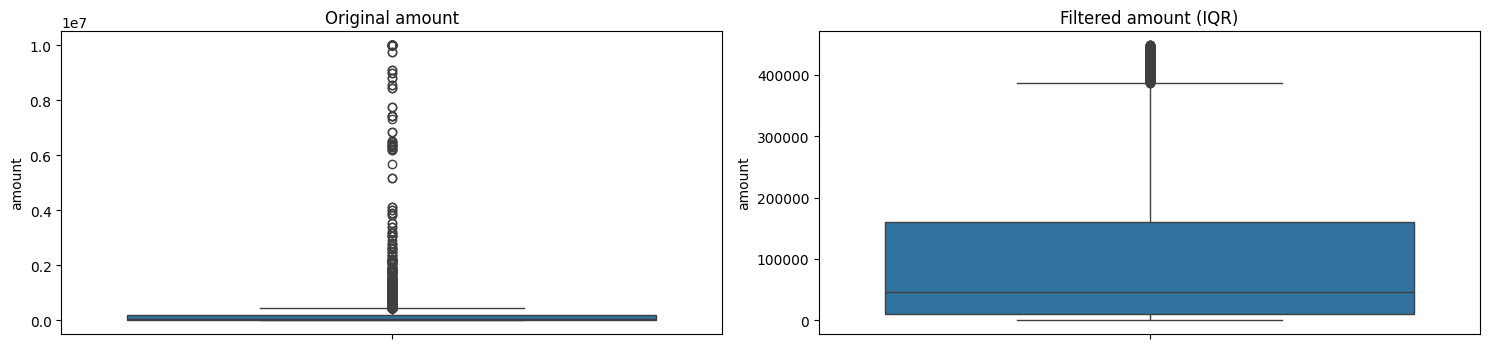

In [37]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_check):
    plt.subplot(3, 2, 2*i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Original {col}')
    
    plt.subplot(3, 2, 2*i+2)
    sns.boxplot(y=df_iqr_filtered[col])
    plt.title(f'Filtered {col} (IQR)')

plt.tight_layout()
plt.show()






# Step 5: Data Visualization

**Distribution Plot (Distplot)**

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

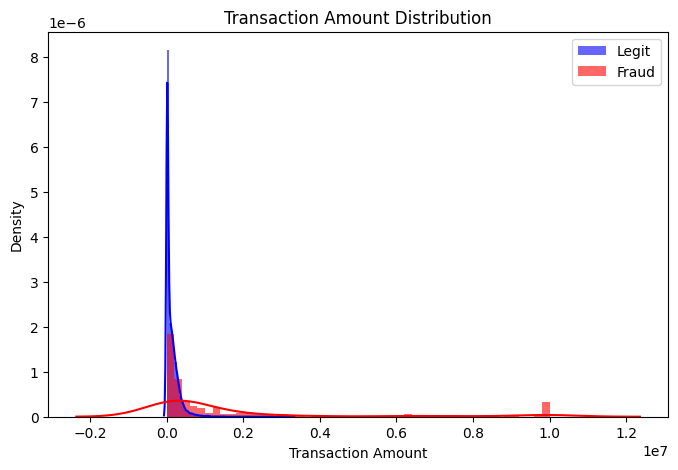

In [38]:
plt.figure(figsize=(8, 5))

sns.distplot(df[df['isFraud'] == 0]['amount'], bins=50, color='blue', label="Legit", hist=True, kde=True, hist_kws={'alpha': 0.6})
sns.distplot(df[df['isFraud'] == 1]['amount'], bins=50, color='red', label="Fraud", hist=True, kde=True, hist_kws={'alpha': 0.6})

plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
plt.show()


**Heatmap**

A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation

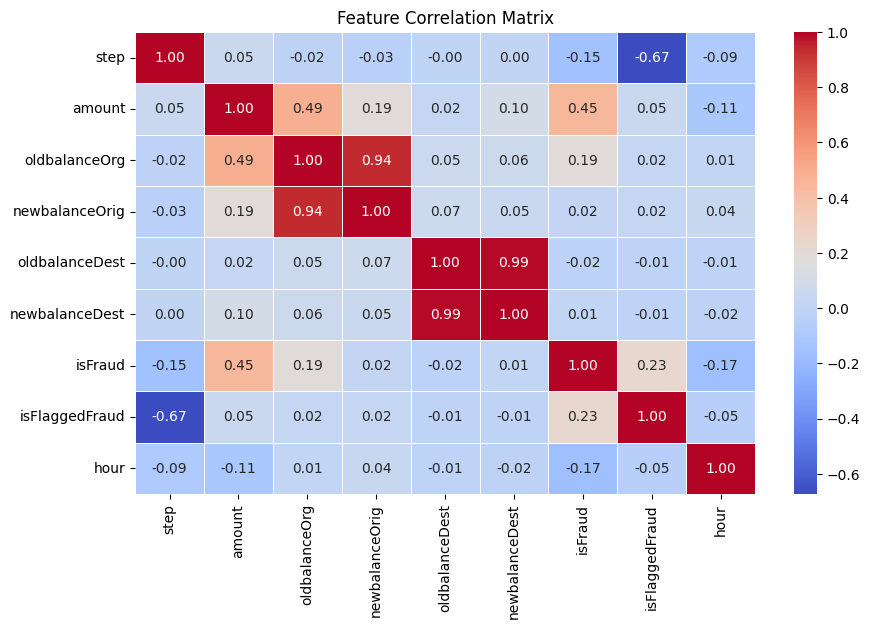

In [39]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Step 6: Model Selection

In [40]:
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','isFlaggedFraud']
target = 'isFraud'
X = df[features]  # Features
y = df[target]    # Target label (0 = Legit, 1 = Fraud)

# Ensure y contains no missing values
y.fillna(0, inplace=True)

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Step 7: Model Evaluation

In [43]:
rf_model = RandomForestClassifier(
    n_estimators=45,
    max_depth=4,  # Reduce further
    min_samples_split=100,  # Increase
    min_samples_leaf=30,  # Increase
    class_weight="balanced",
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=30, min_samples_split=100,
                       n_estimators=45, random_state=42)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

rf_auc = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Random Forest Test AUC-ROC: {rf_auc:.4f}")
print(f"Random Forest Accuracy: {rf_auc * 100:.2f}%")

Random Forest Test AUC-ROC: 0.9683
Random Forest Accuracy: 96.83%


In [45]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"📊 Accuracy:  {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔁 Recall:    {recall:.4f}")
print(f"🧠 F1 Score:  {f1:.4f}")

# Optional: Detailed classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📋 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

📊 Accuracy:  0.9683
🎯 Precision: 0.4980
🔁 Recall:    0.9762
🧠 F1 Score:  0.6595

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3874
           1       0.50      0.98      0.66       126

    accuracy                           0.97      4000
   macro avg       0.75      0.97      0.82      4000
weighted avg       0.98      0.97      0.97      4000


📋 Confusion Matrix:
[[3750  124]
 [   3  123]]


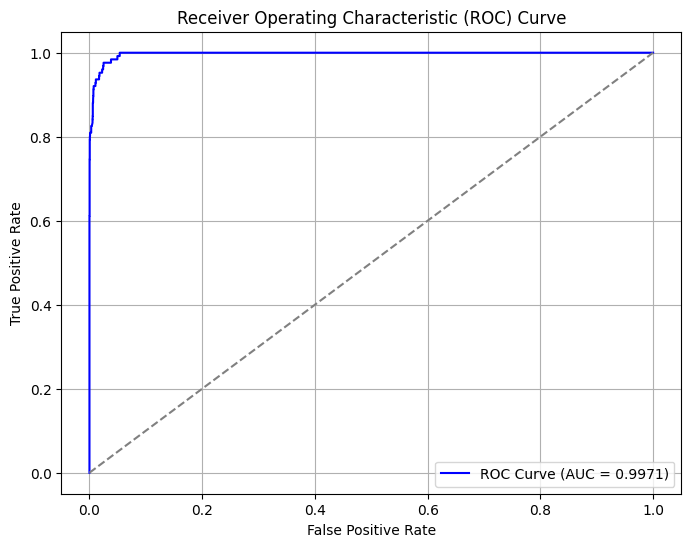

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# ✅ Calculate AUC here before using it
auc = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Hyperparameter turning

In [47]:


import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from scipy.stats import randint
#import joblib

# 1. Load dataset
df = pd.read_csv("onlinefraud1.csv")
df = df[0:20000]

# 2. Drop unwanted columns
df = df.drop(['type', 'nameOrig', 'nameDest'], axis=1)

# 3. Prepare features and target
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Define parameter distribution
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# 6. Create base model
rf = RandomForestClassifier(random_state=42)

# 7. Perform randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Try 10 different combinations
    cv=3,
    n_jobs=1,  # Set to 1 to avoid memory crash
    verbose=2,
    scoring='roc_auc',
    random_state=42
)

# 8. Fit the model
random_search.fit(X_train, y_train)

# 9. Evaluate best model
best_rf = random_search.best_estimator_
y_probs = best_rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs)

print("✅ Best Parameters Found:", random_search.best_params_)
print(f"🎯 AUC of Best Model: {auc:.4f}")



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=221; total time=   1.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=221; total time=   1.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=221; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=187; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=187; total time=  

# Step 7: Model Saving

In [48]:
import joblib
# Save model
joblib.dump(rf_model, 'rf_model3.pkl')
print("✅ Model retrained and saved successfully!")


✅ Model retrained and saved successfully!


# Step 8: Deployment

In [51]:
# Load model trained with 'isFlaggedFraud'
rf_model = joblib.load('rf_model3.pkl')

In [52]:
# Features used for prediction
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']


## Detection code

In [53]:

def detect_fraud(transaction):
    step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, isFlaggedFraud = transaction

    transaction_df = pd.DataFrame([transaction], columns=features)
    rf_prediction = rf_model.predict(transaction_df)[0]
    return int(rf_prediction)


## Prevention code

In [54]:
def prevent_fraud(transaction):
    step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, isFlaggedFraud = transaction

    if isFlaggedFraud == 1:
        return "⚠️ WARNING: Transaction is flagged as fraud and may not be safe."
    if amount > 10000:
        return "🚨 BLOCKED: High transaction amount"
    if oldbalanceOrg < amount:
        return "🚨 BLOCKED: Insufficient balance"
    if oldbalanceDest == 0 and newbalanceDest == 0:
        return "🚨 BLOCKED: Destination balance anomaly"

    ml_result = detect_fraud(transaction)
    return "🚨 BLOCKED: ML detected fraud" if ml_result == 1 else "✅ ALLOWED"